In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import string

import itertools
import time
from pathlib import Path

In [2]:
import black
import jupyter_black

jupyter_black.load(
    line_length=50,
)

In [3]:
# %load_ext jupyter_black

In [4]:
mpl.__version__

'3.6.2'

In [5]:
figures_path = Path("fig_tutorial")

figures_path.mkdir(exist_ok=True)

In [6]:
def plot_something(ax):
    x = np.linspace(0, 50, 5000)
    ax.plot(x, np.sin(x) * x)
    ax.set_xlabel("$x$")
    ax.set_ylabel(r"$x \sin x$")

# Matplotlib tutorial
07 Feb 2023

Rita González Márquez & Nik Böhm

# Vocabulary

## Main terms

- figure
- axes
- axis
- spines
- coordinates systems (figure, axes, data)

Coordinates transformation tutorial: https://matplotlib.org/stable/tutorials/advanced/transforms_tutorial.html

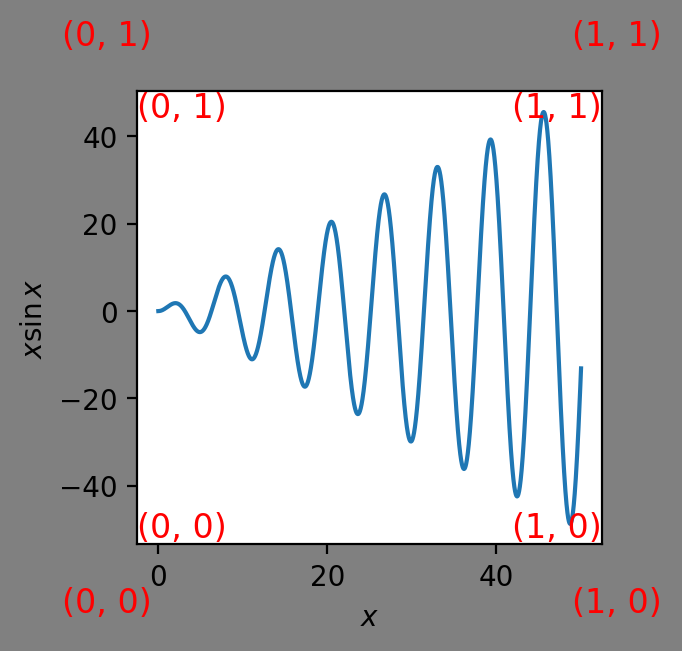

In [7]:
# %matplotlib inline
fig, ax = plt.subplots(
    figsize=(3, 3),
    facecolor="grey",
    dpi=200,
    # layout="constrained",
)

txt_kwargs = dict(color="red", fontsize="larger")

plot_something(ax)

for coord in itertools.product([0, 1], [0, 1]):
    x, y = coord
    ha = "left" if x == 0 else "right"
    va = "top" if y == 1 else "bottom"
    ax.text(
        x,
        y,
        f"({x}, {y})",
        transform=ax.transAxes,
        ha=ha,
        va=va,
        **txt_kwargs,
    )

    fig.text(
        x,
        y,
        f"({x}, {y})",
        transform=fig.transFigure,
        ha=ha,
        va=va,
        **txt_kwargs,
    )

fig.savefig(figures_path / "coords.pdf")

## Working on `plt` vs. `fig` and `ax`

In [8]:
x = np.linspace(0, 50, 5000)
y = np.sin(x) * x

Text(0, 0.5, '$x \\sin x$')

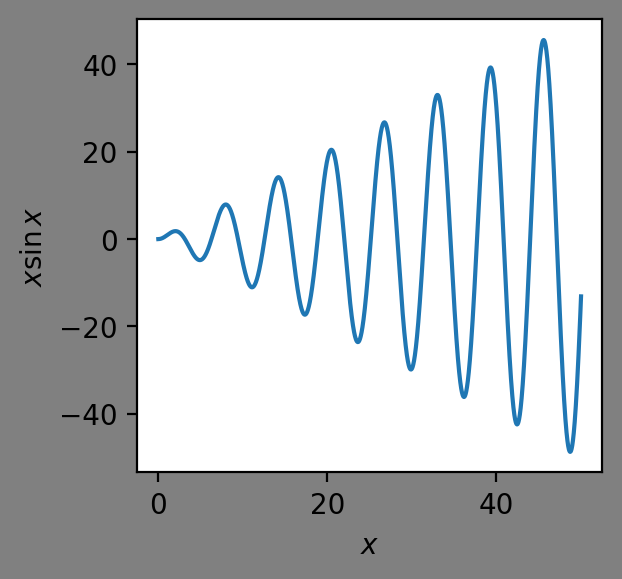

In [9]:
# DON'T DO THIS

plt.figure(
    figsize=(3, 3),
    facecolor="grey",
    dpi=200,
)

plt.plot(x, y)
plt.xlabel("$x$")
plt.ylabel(r"$x \sin x$")
# plt.show()

Text(0, 0.5, '$x \\sin x$')

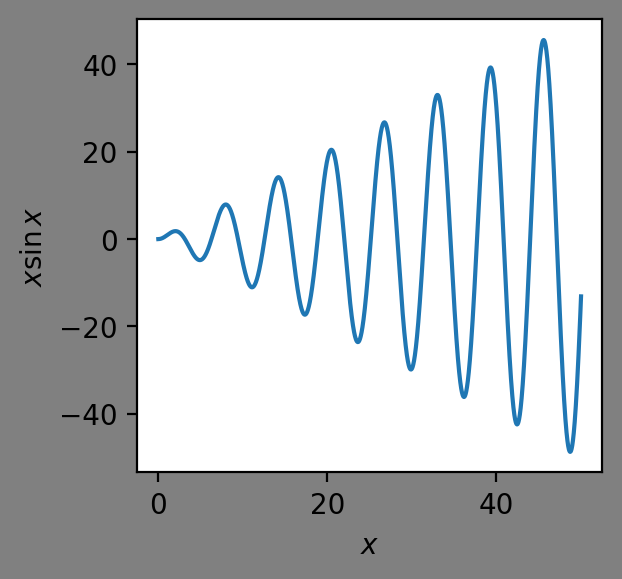

In [10]:
# DO THIS INSTEAD

fig, ax = plt.subplots(
    figsize=(3, 3),
    facecolor="grey",
    dpi=200,
)

ax.plot(x, y)
ax.set_xlabel("$x$")
ax.set_ylabel(r"$x \sin x$")

## Artist

### `plt.Text` + `ax.add_artist`

1. create artist
2. add to axes

Text(0, 1, 'a')

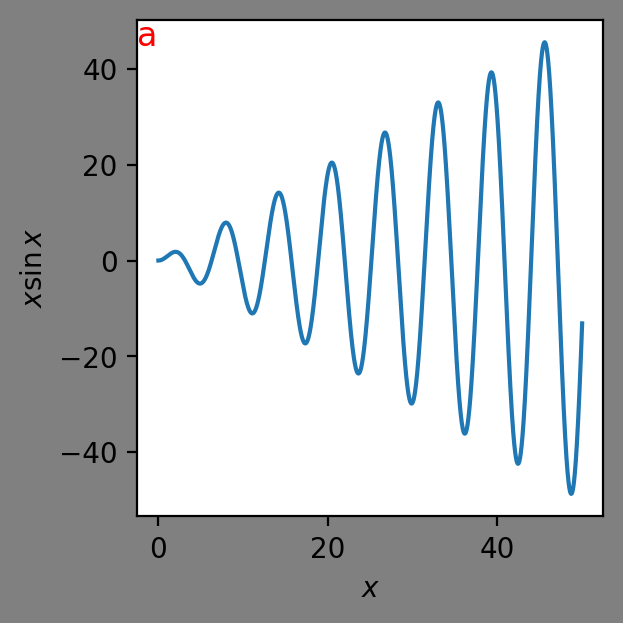

In [26]:
fig, ax = plt.subplots(
    figsize=(3, 3),
    facecolor="grey",
    dpi=200,
    layout="constrained",
)

plot_something(ax)

txt_kwargs = dict(color="red", fontsize="larger")

# create artist
txt = plt.Text(
    0,
    1,
    "a",
    transform=ax.transAxes,
    ha="left",
    va="top",
    # clip_on=False,
    **txt_kwargs,
)

# add to axes
ax.add_artist(txt)

### `ax.text`

ax.text creates the artist and adds it to the axes at the same time

Text(0, 1, 'a')

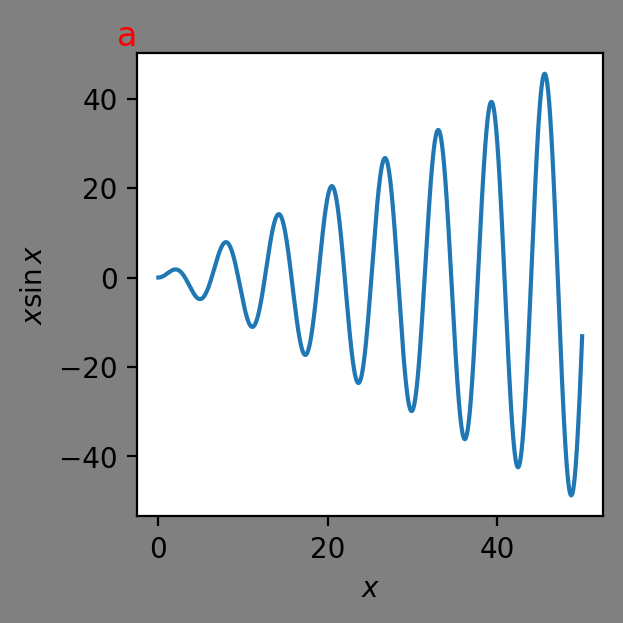

In [12]:
fig, ax = plt.subplots(
    figsize=(3, 3),
    facecolor="grey",
    dpi=200,
    layout="constrained",
)
plot_something(ax)
txt_kwargs = dict(color="red", fontsize="larger")


ax.text(
    0,
    1,
    "a",
    transform=ax.transAxes,
    ha="right",
    va="bottom",
    **txt_kwargs,
)

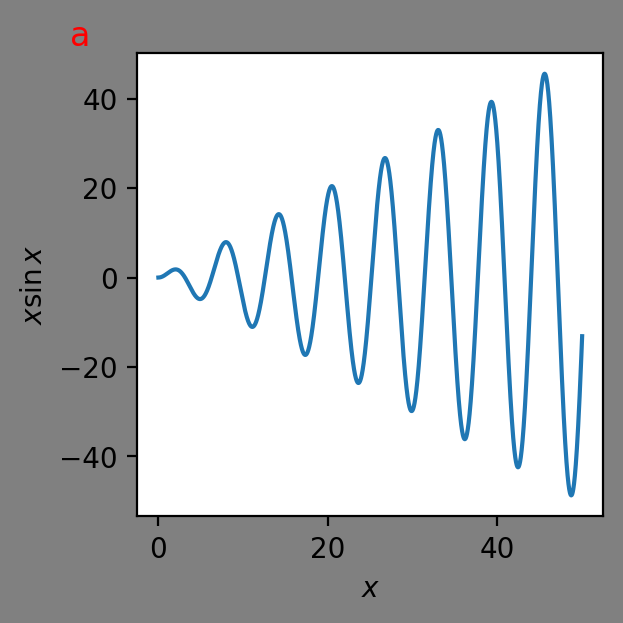

In [13]:
fig, ax = plt.subplots(
    figsize=(3, 3),
    facecolor="grey",
    dpi=200,
    layout="constrained",
)
plot_something(ax)
txt_kwargs = dict(color="red", fontsize="larger")

ax.text(
    -0.1,
    1,
    string.ascii_lowercase[0],
    transform=ax.transAxes,
    ha="right",
    va="bottom",
    **txt_kwargs,
)

fig.savefig(figures_path / "coords.pdf")

### `ax.set_title`

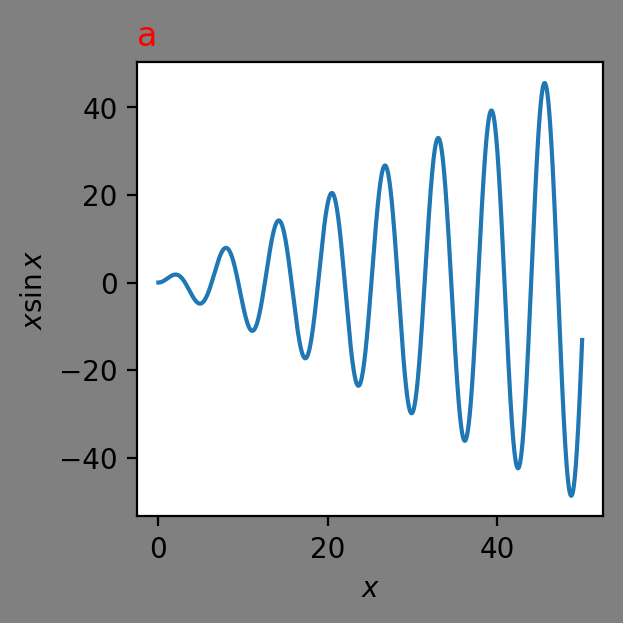

In [14]:
fig, ax = plt.subplots(
    figsize=(3, 3),
    facecolor="grey",
    dpi=200,
    layout="constrained",
)
plot_something(ax)
txt_kwargs = dict(color="red", fontsize="larger")

ax.set_title(
    string.ascii_lowercase[0],
    loc="left",
    **txt_kwargs,
)

fig.savefig(figures_path / "coords.pdf")

More info on text alignment: https://matplotlib.org/stable/gallery/text_labels_and_annotations/text_alignment.html

# Subplots

## `plt.subplots`

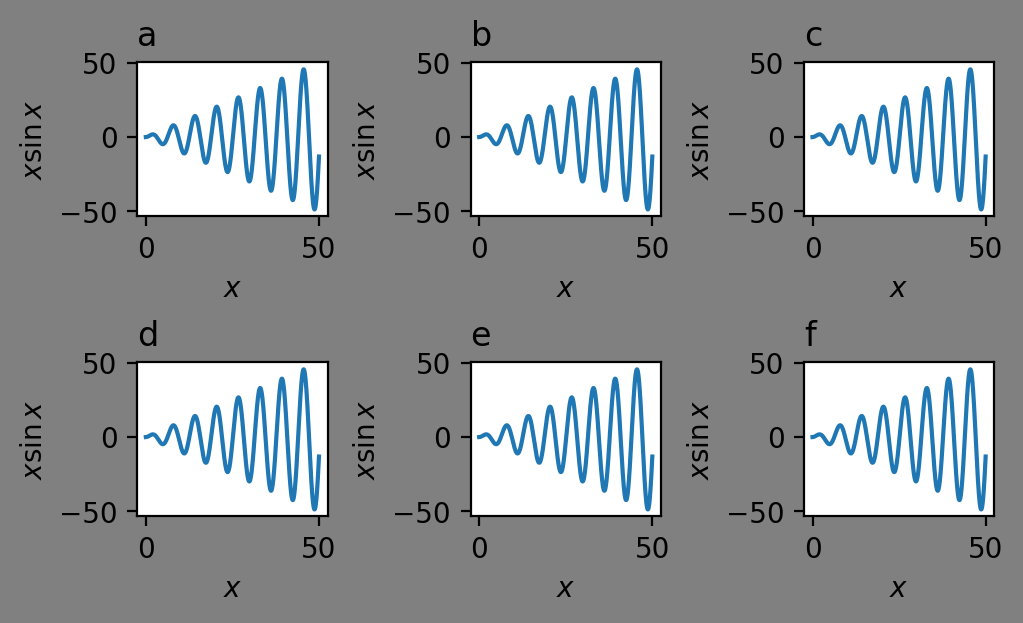

In [15]:
fig, axs = plt.subplots(
    nrows=2,
    ncols=3,
    figsize=(5, 3),
    facecolor="grey",
    dpi=200,
    layout="constrained",
)

# print(axs)

txt_kwargs = dict(
    color="black", fontsize="larger"
)

for ax, letter in zip(axs.flat, "abcdefghijk"):
    plot_something(ax)

    ax.set_title(letter, loc="left", **txt_kwargs)

## `plt.subplot`

Never use 👎

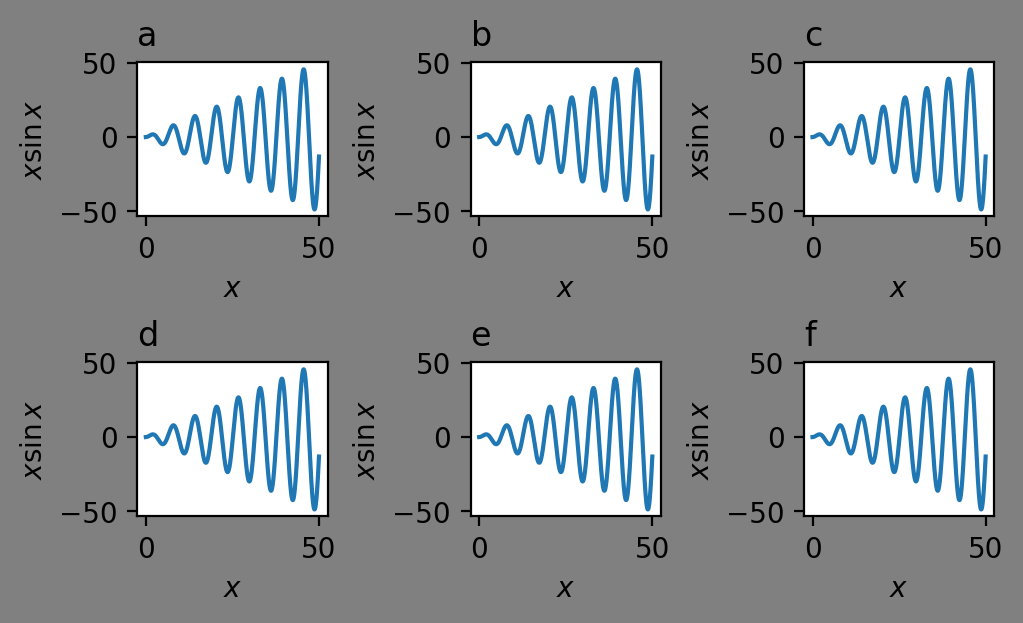

In [16]:
fig = plt.figure(
    figsize=(5, 3),
    facecolor="grey",
    dpi=200,
    layout="constrained",
)

txt_kwargs = dict(
    color="black", fontsize="larger"
)


ax0 = fig.add_subplot(231)  # or plt.subplot(231)
ax1 = fig.add_subplot(232)
ax2 = fig.add_subplot(233)
ax3 = fig.add_subplot(234)
ax4 = fig.add_subplot(235)
ax5 = fig.add_subplot(236)


for ax, letter in zip(
    fig.get_axes(), "abcdefghijk"
):
    plot_something(ax)
    ax.set_title(letter, loc="left", **txt_kwargs)

## `plt.subplot_mosaic`

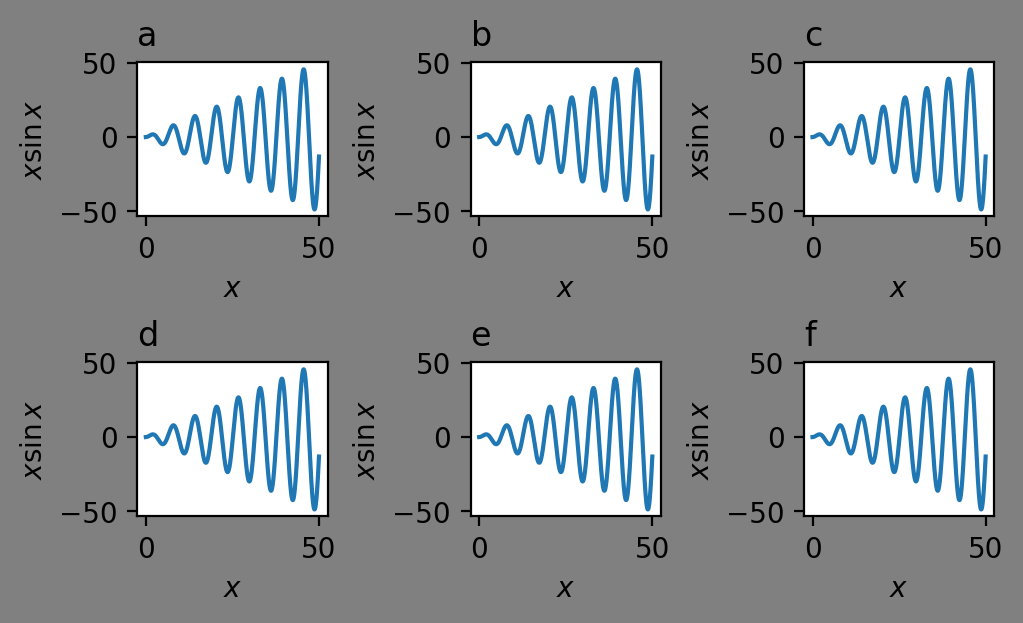

In [17]:
mosaic = """
abc
def
"""
fig, ax_dict = plt.subplot_mosaic(
    mosaic,
    figsize=(5, 3),
    facecolor="grey",
    dpi=200,
    layout="constrained",
)

txt_kwargs = dict(
    color="black", fontsize="larger"
)

for letter, ax in ax_dict.items():
    plot_something(ax)

    ax.set_title(letter, loc="left", **txt_kwargs)

{'a': <AxesSubplot: label='a'>, 'b': <AxesSubplot: label='b'>, 'c': <AxesSubplot: label='c'>, 'd': <AxesSubplot: label='d'>, 'e': <AxesSubplot: label='e'>}


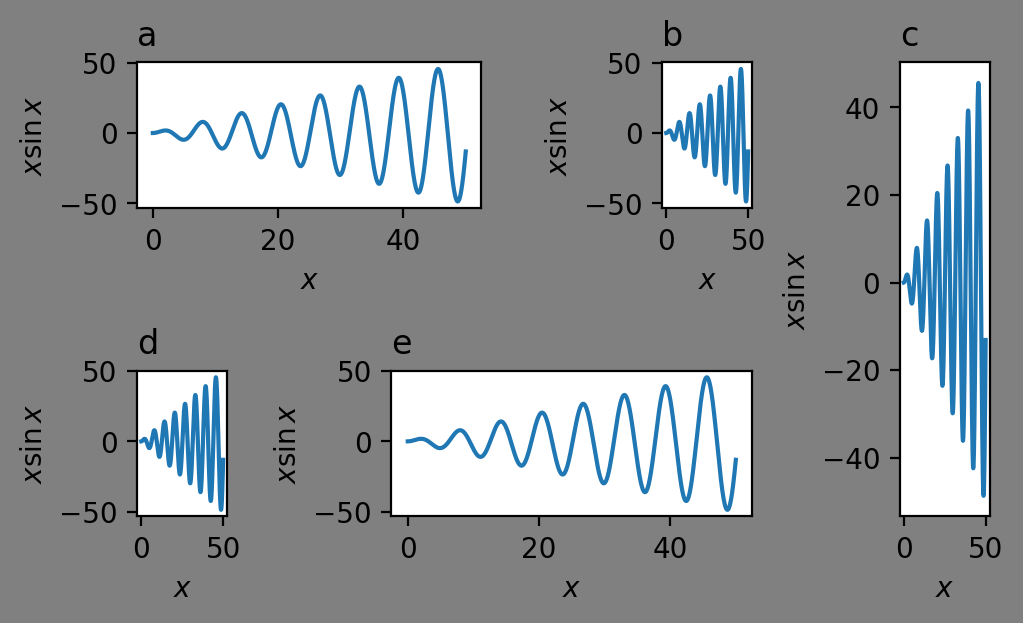

In [18]:
mosaic = """
aabc
deec
"""
fig, ax_dict = plt.subplot_mosaic(
    mosaic,
    figsize=(5, 3),
    facecolor="grey",
    dpi=200,
    layout="constrained",
)

print(ax_dict)

txt_kwargs = dict(
    color="black", fontsize="larger"
)

for letter, ax in ax_dict.items():
    plot_something(ax)

    ax.set_title(letter, loc="left", **txt_kwargs)

## `plt.gridspec`

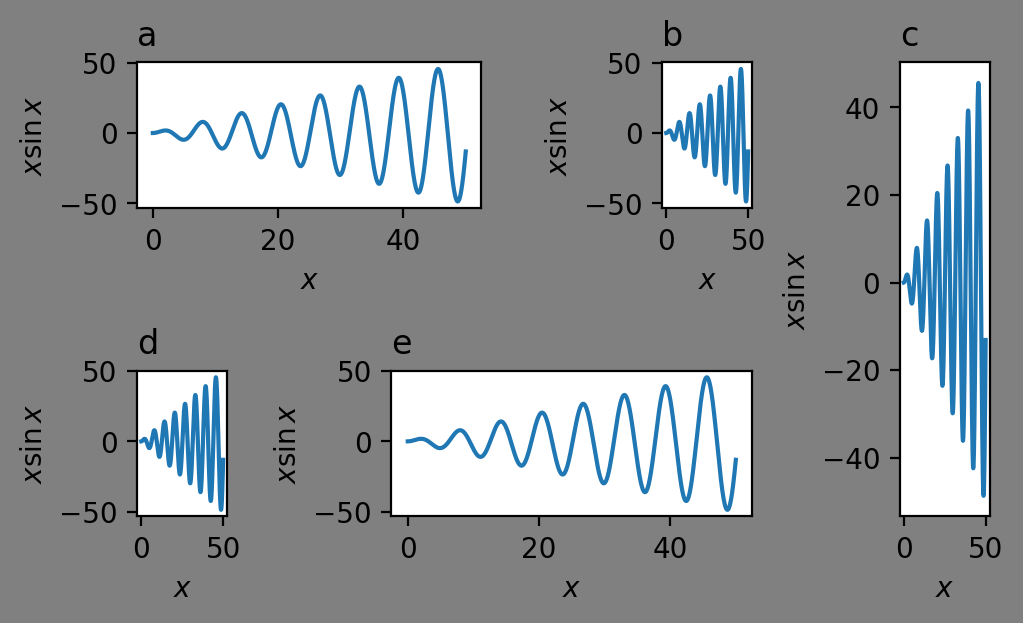

In [19]:
fig = plt.figure(
    figsize=(5, 3),
    facecolor="grey",
    dpi=200,
    layout="constrained",
)
gs = mpl.gridspec.GridSpec(2, 4, figure=fig)

txt_kwargs = dict(
    color="black", fontsize="larger"
)


ax0 = fig.add_subplot(gs[0, :2])
ax1 = fig.add_subplot(gs[0, 2])
ax2 = fig.add_subplot(gs[:, 3])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1:3])


for ax, letter in zip(
    fig.get_axes(), "abcdefghijk"
):
    plot_something(ax)
    ax.set_title(letter, loc="left", **txt_kwargs)

## `plt.subplots` + `width_ratios` and `height_ratios`

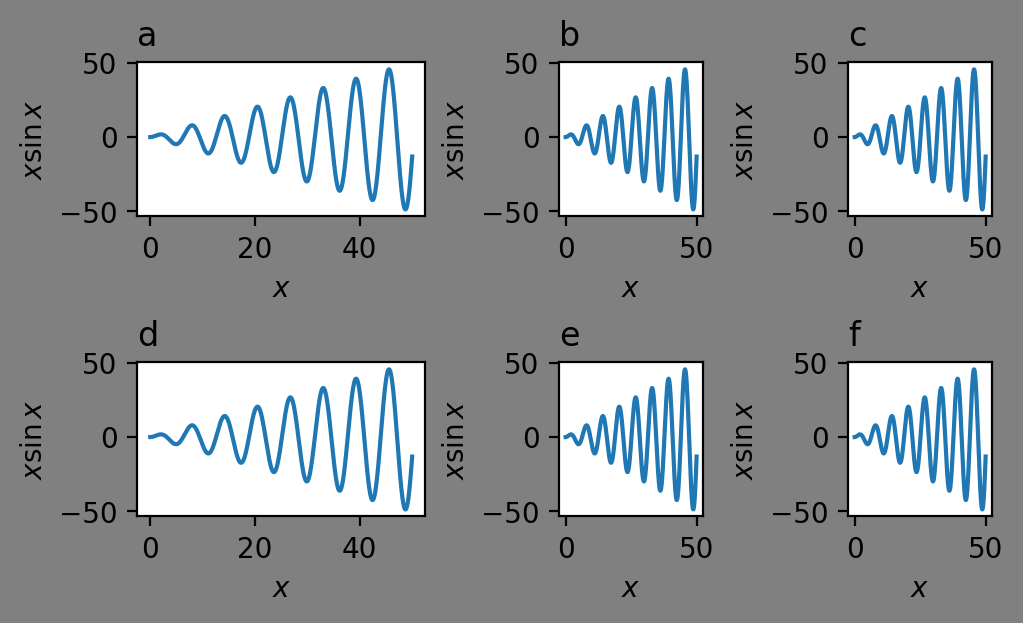

In [20]:
fig, axs = plt.subplots(
    nrows=2,
    ncols=3,
    figsize=(5, 3),
    facecolor="grey",
    dpi=200,
    layout="constrained",
    width_ratios=[0.5, 0.25, 0.25],
)

# print(axs)

txt_kwargs = dict(
    color="black", fontsize="larger"
)

for ax, letter in zip(axs.flat, "abcdefghijk"):
    plot_something(ax)

    ax.set_title(letter, loc="left", **txt_kwargs)

## `plt.figure` + `fig.add_axes()`

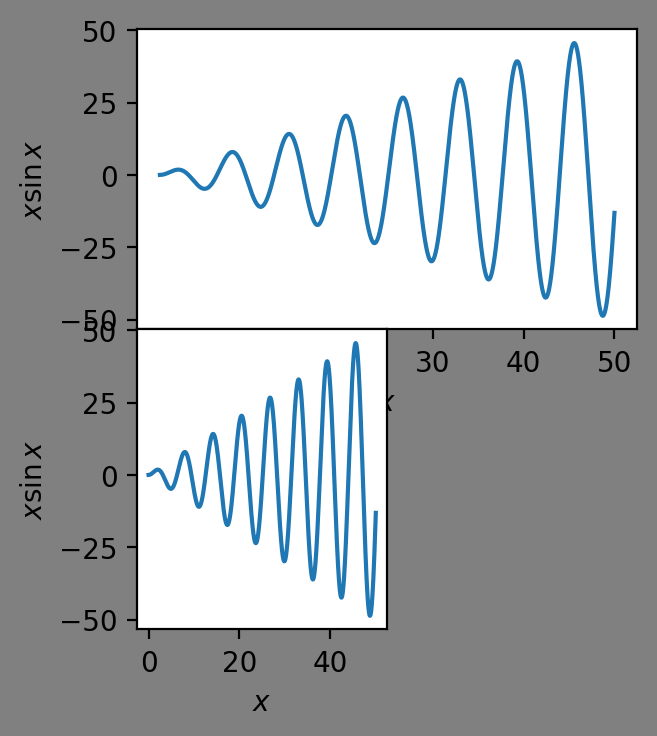

In [21]:
fig = plt.figure(
    figsize=(5, 3),
    facecolor="grey",
    dpi=200,
    # layout="constrained",
)

ax0 = fig.add_axes(
    (0, 0.5, 0.5, 0.5)
)  # (left, bottom, width, height)
plot_something(ax0)

ax1 = fig.add_axes((0, 0, 0.25, 0.5))
plot_something(ax1)

fig.savefig(figures_path / "add_axes.pdf")

# Whitespaces

## `layout='constrained'`

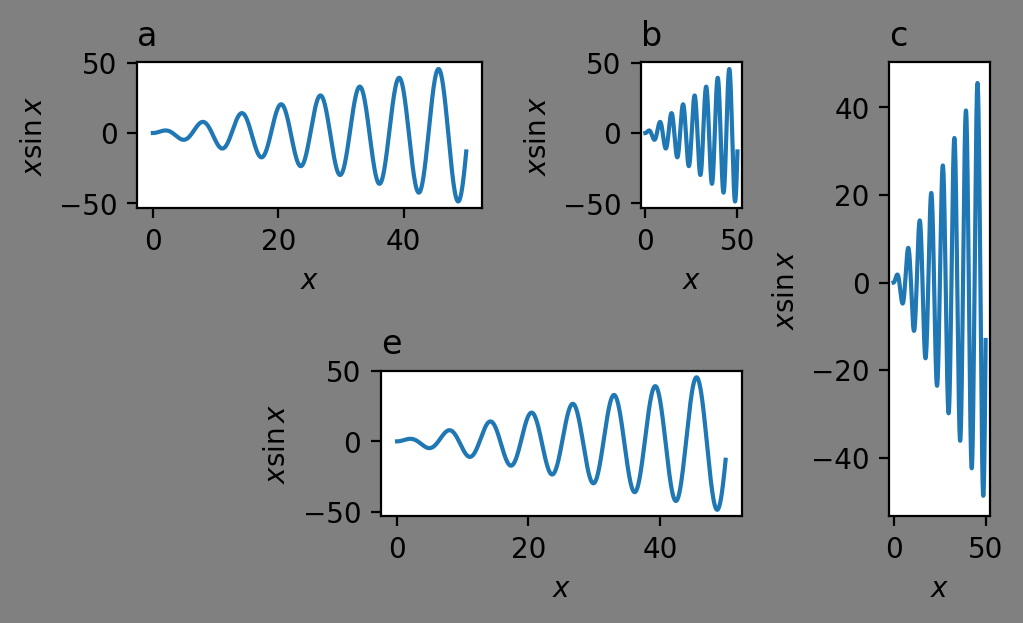

In [22]:
mosaic = """
aabc
.eec
"""
fig, ax_dict = plt.subplot_mosaic(
    mosaic,
    figsize=(5, 3),
    facecolor="grey",
    dpi=200,
    layout="constrained",
)

txt_kwargs = dict(
    color="black", fontsize="larger"
)

for letter, ax in ax_dict.items():
    plot_something(ax)

    ax.set_title(letter, loc="left", **txt_kwargs)
fig.savefig(figures_path / "constrained.pdf")

## `layout=None`

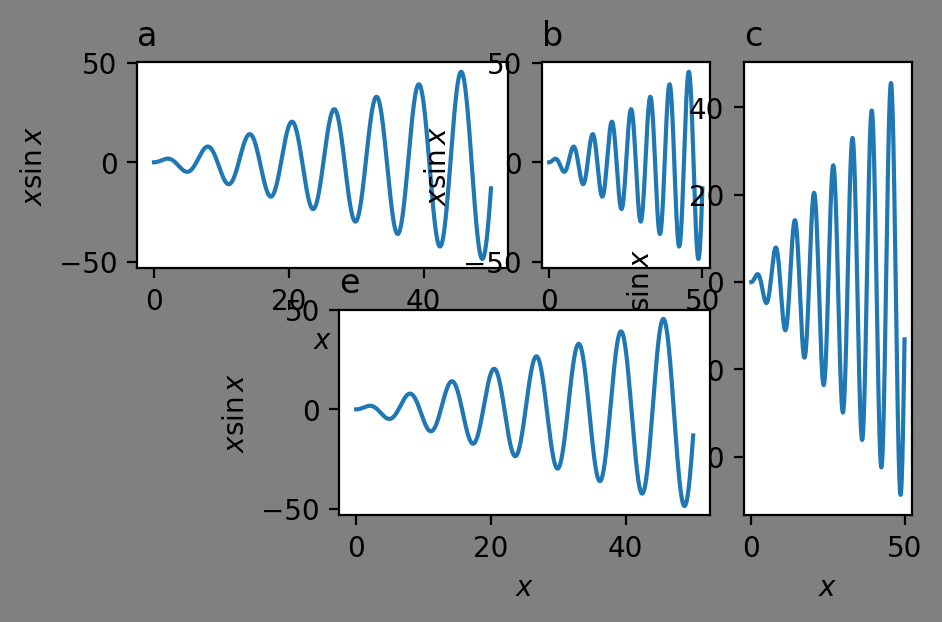

In [34]:
mosaic = """
aabc
.eec
"""
fig, ax_dict = plt.subplot_mosaic(
    mosaic,
    figsize=(5, 3),
    facecolor="grey",
    dpi=200,
    layout=None,
)

txt_kwargs = dict(
    color="black", fontsize="larger"
)

for letter, ax in ax_dict.items():
    plot_something(ax)

    ax.set_title(letter, loc="left", **txt_kwargs)

## `layout='tight'`
 Same as `plt.tight_layout()`

Advantages of constrained layout vs. tight layout:
https://github.com/matplotlib/cheatsheets/issues/30

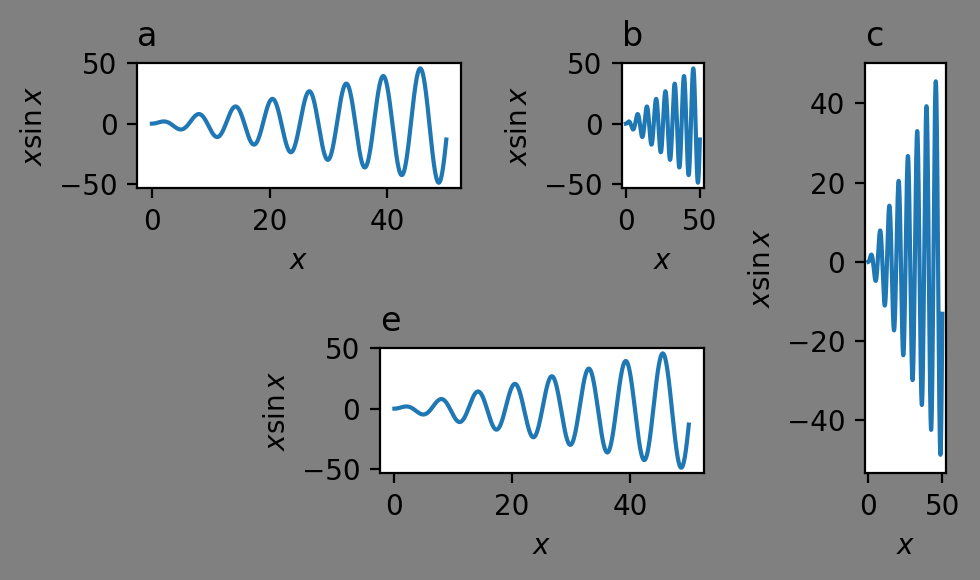

In [27]:
mosaic = """
aabc
.eec
"""
fig, ax_dict = plt.subplot_mosaic(
    mosaic,
    figsize=(5, 3),
    facecolor="grey",
    dpi=200,
    layout="tight",
)

txt_kwargs = dict(
    color="black", fontsize="larger"
)

for letter, ax in ax_dict.items():
    plot_something(ax)

    ax.set_title(letter, loc="left", **txt_kwargs)
fig.savefig(figures_path / "tight.pdf")

## `fig.savefig(bbox_inches='tight')`

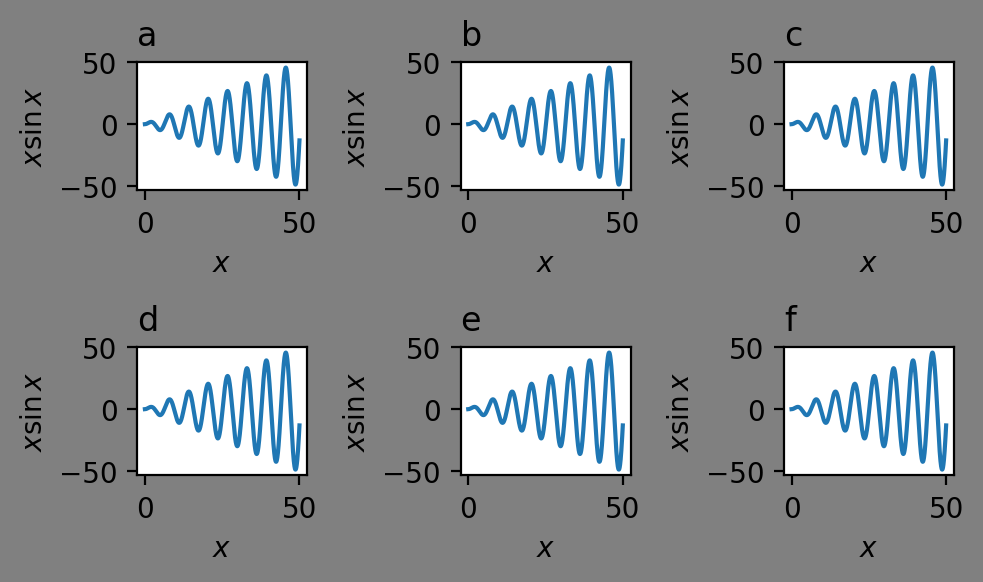

In [28]:
fig, axs = plt.subplots(
    nrows=2,
    ncols=3,
    figsize=(5, 3),
    facecolor="grey",
    dpi=200,
    layout="tight",
)

txt_kwargs = dict(
    color="black", fontsize="larger"
)

for ax, letter in zip(axs.flat, "abcdefghijk"):
    plot_something(ax)

    ax.set_title(letter, loc="left", **txt_kwargs)

fig.savefig(
    figures_path / "bbox_inches.pdf",
    bbox_inches="tight",
)

In [29]:
def mm_to_in(x):
    return x / 25.4

In [30]:
mm_to_in(127)

5.0

# Figures for journal submission

## Style

Template for style file: https://matplotlib.org/stable/tutorials/introductory/customizing.html#customizing-with-style-sheets

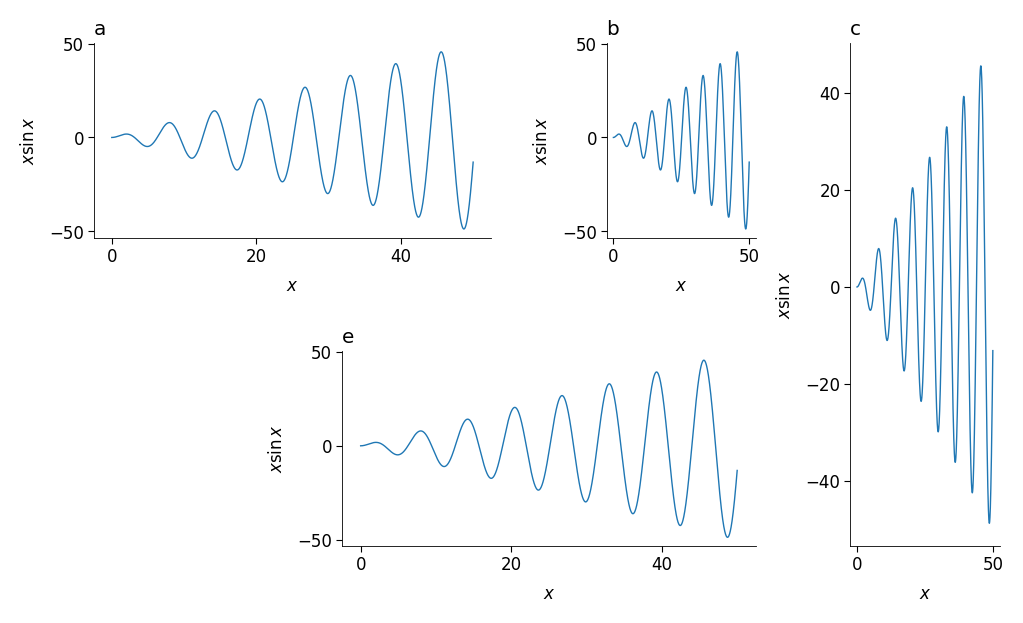

In [31]:
with plt.style.context("tutorial_style.txt"):
    mosaic = """
    aabc
    .eec
    """
    fig, ax_dict = plt.subplot_mosaic(
        mosaic,
        figsize=(5, 3),
        dpi=200,
        layout="constrained",
    )

    txt_kwargs = dict(
        color="black", fontsize="larger"
    )

    for letter, ax in ax_dict.items():
        plot_something(ax)

        ax.set_title(
            letter, loc="left", **txt_kwargs
        )
    # fig.savefig(figures_path / "constrained.pdf")

In [32]:
# plt.style.use('tutorial_style.txt')

## Fontsizes

### Relative fontsizes

https://stackoverflow.com/questions/62288898/matplotlib-values-for-the-xx-small-x-small-small-medium-large-x-large-xx

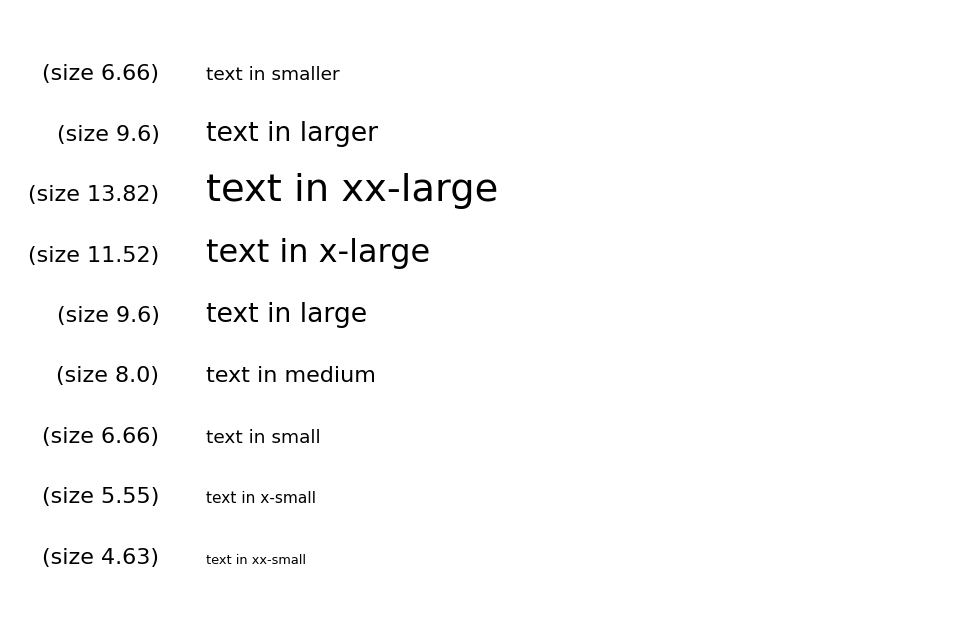

In [33]:
with plt.rc_context({"font.size": 8}):
    fig, ax = plt.subplots(dpi=200)
    ax.set_axis_off()
    fonts = [
        "xx-small",
        "x-small",
        "small",
        "medium",
        "large",
        "x-large",
        "xx-large",
        "larger",
        "smaller",
    ]

    for y, size in enumerate(fonts):
        txt = ax.text(
            0.2,
            y / 10 + 0.1,
            f"text in {size}",
            fontsize=size,
        )
        ptsize = f"(size {round(txt.get_fontsize(), 2)})"
        ax.text(
            0.15, y / 10 + 0.1, ptsize, ha="right"
        )

# Summary

The way of having a final figure ready for a journal/conference submission directly from python is:
1. Do subplots in python and not in an external editor (`plt.subplots`).
2. Set `figsize` (in inches!) to have the required width by the journal/conferences.
    + then the figure will not be rescaled in the manuscript (cause it's the right size)
    + the specified fontsize in python will match the fontsize in LaTeX  
3. Use a style file!
    + specify fonts and fontsizes in there
    + despine axis
    + customize linewidths

Advantages of this approach:
- if results change, the figure can be easily redone (by rerunning the script)
- layout is more consistent
- your inner perfectionist (and your supervisor) will be satisfied